### Extracting the number of movement and time in SCIT1 and SCIT2

In [1]:
from update_feature_function import extract_json_file
import pandas as pd 
import numpy as np



#################################################################
### 	input information
#################################################################

video_list = ['EJ00004'] # ['JJ00013', 'SB00012']
time_list = [[11.6666,16.6666,11.6666,16.6666]] #[[16+ 2/60,21+ 2/60,16+2/60,21+2/60],[16+28/60, 21+28/60, 16+28/60, 21+28/60]]

Dv = []
Dm = []


for i in range(len(video_list)):
    video_name = video_list[i]
    SCIT_start = time_list[i][0]
    SCIT_end = time_list[i][1]
    
    Xv, Xm = extract_json_file(video_name, SCIT_start, SCIT_end, 20, 20, 30)

    Xv = pd.DataFrame(Xv)
    Xv.columns = ['num_movement_scit1','list_movement_time_s_scit1', 'list_start_time_s_scit1']
#     body_part = ["Nose",  "Neck"]
#                 ,  "RShoulder",  "RElbow",  "RWrist",  "LShoulder",  \
#                 "LElbow",  "LWrist",  "MidHip",  "RHip", "RKnee", "RAnkle", "LHip", "LKnee", \
#                 "LAnkle", "REye", "LEye", "REar", "LEar", "LBigToe", "LSmallToe", "LHeel", \
#                 "RBigToe", "RSmallToe", "RHeel"]
#     Xv.insert(0,'body_part',body_part)
    print(Xv)
    Dv.append(Xv)

    Xm = pd.DataFrame(Xm)
    Xm.columns = ['num_movement_scit1','list_movement_time_s_scit1', 'list_start_time_s_scit1']
#     body_part = ["Nose",  "Neck"]
#                 ,  "RShoulder",  "RElbow",  "RWrist",  "LShoulder",  \
#                 "LElbow",  "LWrist",  "MidHip",  "RHip", "RKnee", "RAnkle", "LHip", "LKnee", \
#                 "LAnkle", "REye", "LEye", "REar", "LEar", "LBigToe", "LSmallToe", "LHeel", \
#                 "RBigToe", "RSmallToe", "RHeel"]
#     Xm.insert(0,'body_part',body_part)
    print(Xm)
    Dm.append(Xm)


starting extract EJ00004 JSON files...
EJ00004Number of movement based on velocity(threshold_v =  0.0625 ):
34
0
EJ00004Number of movement based on velocity(threshold_v =  0.125 ):
45
0
EJ00004Number of movement based on velocity(threshold_v =  0.1875 ):
47
0
EJ00004Number of movement based on velocity(threshold_v =  0.25 ):
43
0
EJ00004Number of movement based on velocity(threshold_v =  0.3125 ):
40
0
EJ00004Number of movement based on velocity(threshold_v =  0.375 ):
36
0
EJ00004Number of movement based on velocity(threshold_v =  0.4375 ):
30
0
EJ00004Number of movement based on velocity(threshold_v =  0.5 ):
26
0
EJ00004Number of movement based on velocity(threshold_v =  0.5625 ):
22
0
EJ00004Number of movement based on velocity(threshold_v =  0.625 ):
21
0
EJ00004Number of movement based on velocity(threshold_v =  0.6875 ):
18
0
EJ00004Number of movement based on velocity(threshold_v =  0.75 ):
15
0
EJ00004Number of movement based on velocity(threshold_v =  0.8125 ):
11
0
EJ00004Nu

In [2]:
Dv = pd.concat(Dv, keys = video_list)
Dv['total_movement_time_s_scit1'] = Dv['list_movement_time_s_scit1'].apply(lambda x: np.sum(x))

Dm = pd.concat(Dm, keys = video_list)
Dm['total_movement_time_s_scit1'] = Dm['list_movement_time_s_scit1'].apply(lambda x: np.sum(x))


In [3]:
Dv.to_csv('test_v.csv')
Dm.to_csv('test_m.csv')

In [4]:
df_h = pd.read_excel('1_clean_data.xlsx', index_col=None, header=None)
D_RA = df_h[[1,7,13,19,25]]


D_RA
import time

D_curr = []
for i in range(5):
    D_h = D_RA[i * 6 +1]
    D_h = D_h.dropna()
    D_c = D_h.tolist()

    j = 0
    while j < len(D_c): 
        for k in range(len(D_c)):
            if j != k:
                if abs(D_c[j] - D_c[k]) < 2:
                    del D_c[j]
                    j = j - 1;
                    break
        j = j + 1

    D_curr.append(D_c)
D_RA = D_curr
D_RA

# D_c = []
# for i in range(len(D_h)):
#     t1 = D_h.iloc[i]
#     if isinstance(t1, str):
#         t1 = time.strptime(t1.split('.')[0],'%H:%M:%S')
#         t1 = t1.tm_min*60 + t1.tm_sec
#     else:
#         t1 = t1.minute * 60 + t1.second + t1.microsecond / 1000000
    
#     same = 0
    
#     for j in range(i+1,len(D_h)):
#         t2 = D_h.iloc[j]
#         if isinstance(t2, str):
#             t2 = time.strptime(t2.split('.')[0],'%H:%M:%S')
#             t2 = t2.tm_min*60 + t2.tm_sec
#         else:
#             t2 = t2.minute * 60 + t2.second + t2.microsecond / 1000000
        
#         if abs(t2 - t1) < 2:
#             same = 1
#     if same == 1:
#         D_c.append(t1)

# D_c2 = [D_c[0]]
# for i in range(1,len(D_c)):
#     same = 0
#     for j in range(len(D_c2)):
#         if abs(D_c[i] - D_c2[j]) < 2:
#             same = 1
#     if same == 0:
#         D_c2.append(D_c[i])
# len(D_c2)

[[706.6403198,
  747.173645,
  762.9736328,
  815.3736572,
  818.506958,
  862.1069946,
  864.3736572,
  879.1069946,
  927.4403076,
  930.5736694,
  973.2402954,
  995.506958],
 [725.1333618,
  732.8666382,
  742.4333496,
  762.4333496,
  765.4333496,
  771.0999756,
  789.9666748,
  795.1333618,
  814.1333618,
  821.4666748,
  843.1333618,
  862.1333618,
  866.0666504,
  873.4000244,
  877.166687,
  891.6333618,
  927.9666748,
  936.6333618,
  964.833313,
  973.833313,
  990.5,
  996.5],
 [724.4, 743.199, 843.466, 929.532, 995.132],
 [702.981018066406,
  725.495971679688,
  732.088012695312,
  738.096313476562,
  746.221984863281,
  761.705017089844,
  764.843994140625,
  771.7080078125,
  781.302978515625,
  787.677978515625,
  814.247009277344,
  822.658996582031,
  843.679016113281,
  862.377990722656,
  866.461975097656,
  873.3330078125,
  891.682006835938,
  927.340026855469,
  931.206665039062,
  936.817993164062,
  963.672973632812,
  973.60400390625,
  979.681030273438],
 [70

In [76]:
count_l_RA = []
RA_len = []

for num in range(5):
    count_l = []
    D_c = D_RA[num]
    RA_len.append(len(D_c))
    for i in range(int(len(Dv.list_start_time_s_scit1) / 2)):
        count = 0
        t1_list = Dv.list_start_time_s_scit1[i*2]
        t1_dur_list = Dv.list_movement_time_s_scit1[i*2]
        for k in range(len(D_c)):
            for j in range(len(t1_list)):
                t1 = time.strptime(t1_list[j],'%M:%S')
                t1 = t1.tm_min*60 + t1.tm_sec
                d1 = t1_dur_list[j]
                if abs(D_c[k] - t1) < 2 or (t1 < D_c[k] and D_c[k] < t1+d1):
                    count = count + 1
                    break
        count_l.append(count)
    count_l_RA.append(count_l)


count_l_RA_pred = []

for num in range(5):
    count_l = []
    D_c = D_RA[num]
    for i in range(int(len(Dv.list_start_time_s_scit1) / 2)):
        count = 0
        t1_list = Dv.list_start_time_s_scit1[i*2]
        t1_dur_list = Dv.list_movement_time_s_scit1[i*2]
        for j in range(len(t1_list)):
            for k in range(len(D_c)):
                t1 = time.strptime(t1_list[j],'%M:%S')
                t1 = t1.tm_min*60 + t1.tm_sec
                d1 = t1_dur_list[j]
                if abs(D_c[k] - t1) < 2 or (t1 < D_c[k] and D_c[k] < t1+d1):
                    count = count + 1
                    break
        count_l.append(count)
    count_l_RA_pred.append(count_l)
    
print(RA_len)
print(count_l_RA)
print(count_l_RA_pred)

[12, 22, 5, 23, 14]
[[12, 12, 12, 12, 12, 12, 11, 11, 10, 8, 6, 4, 3, 3, 1, 1, 0, 0, 0], [22, 22, 22, 22, 22, 22, 22, 22, 22, 18, 15, 13, 8, 7, 2, 1, 0, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 2, 1, 1, 1, 1, 0, 0, 0, 0], [23, 23, 23, 23, 23, 23, 23, 22, 21, 16, 15, 13, 8, 7, 3, 1, 0, 0, 0], [14, 14, 14, 14, 14, 14, 14, 13, 13, 12, 11, 9, 5, 5, 3, 1, 0, 0, 0]]
[[29, 33, 36, 32, 31, 27, 23, 19, 14, 11, 10, 6, 2, 2, 1, 1, 0, 0, 0], [31, 39, 39, 37, 35, 31, 25, 23, 21, 19, 17, 13, 8, 6, 2, 1, 0, 0, 0], [27, 30, 25, 25, 23, 18, 14, 13, 10, 4, 3, 2, 1, 1, 1, 0, 0, 0, 0], [28, 37, 39, 38, 36, 30, 25, 21, 18, 16, 15, 12, 9, 6, 3, 1, 0, 0, 0], [29, 35, 39, 38, 34, 29, 25, 19, 17, 13, 12, 9, 6, 5, 3, 1, 0, 0, 0]]


In [77]:
recall = []
for i in range(len(RA_len)):
    recall.append(np.array(count_l_RA[i]) / RA_len[i])
recall

[array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.91666667, 0.91666667, 0.83333333, 0.66666667,
        0.5       , 0.33333333, 0.25      , 0.25      , 0.08333333,
        0.08333333, 0.        , 0.        , 0.        ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.81818182,
        0.68181818, 0.59090909, 0.36363636, 0.31818182, 0.09090909,
        0.04545455, 0.        , 0.        , 0.        ]),
 array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0.6, 0.4, 0.2, 0.2,
        0.2, 0.2, 0. , 0. , 0. , 0. ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.95652174, 0.91304348, 0.69565217,
        0.65217391, 0.56521739, 0.34782609, 0.30434783, 0.13043478,
        0.04347826, 0.        , 0.        , 0.        ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0

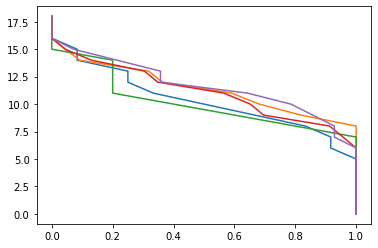

In [78]:
import matplotlib.pyplot as plt
plt.plot(np.array(recall).T, np.arange(0,19))

In [79]:
preci = []
for i in range(len(RA_len)):
    preci.append(count_l_RA_pred[i] / Dv.num_movement_scit1[0::2])

In [80]:
np.array(preci)[:,4].mean()

0.7949999999999999

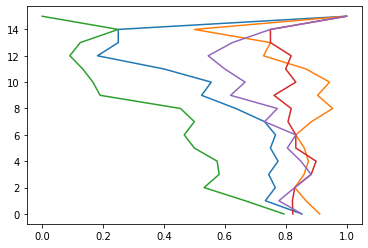

In [81]:
plt.plot(np.array(preci).T, np.arange(0,19))

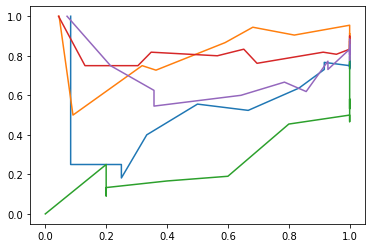

In [82]:
plt.plot(np.array(recall).T, np.array(preci).T)

In [83]:
count_l_RA = []
RA_len = []

for num in range(5):
    count_l = []
    D_c = D_RA[num]
    RA_len.append(len(D_c))
    for i in range(int(len(Dm.list_start_time_s_scit1) / 2)):
        count = 0
        t1_list = Dm.list_start_time_s_scit1[i*2]
        t1_dur_list = Dm.list_movement_time_s_scit1[i*2]
        for k in range(len(D_c)):
            for j in range(len(t1_list)):
                t1 = time.strptime(t1_list[j],'%M:%S')
                t1 = t1.tm_min*60 + t1.tm_sec
                d1 = t1_dur_list[j]
                if abs(D_c[k] - t1) < 2 or (t1 < D_c[k] and D_c[k] < t1+d1):
                    count = count + 1
                    break
        count_l.append(count)
    count_l_RA.append(count_l)

count_l_RA_pred = []

for num in range(5):
    count_l = []
    D_c = D_RA[num]
    for i in range(int(len(Dm.list_start_time_s_scit1) / 2)):
        count = 0
        t1_list = Dm.list_start_time_s_scit1[i*2]
        t1_dur_list = Dm.list_movement_time_s_scit1[i*2]
        for j in range(len(t1_list)):
            for k in range(len(D_c)):
                t1 = time.strptime(t1_list[j],'%M:%S')
                t1 = t1.tm_min*60 + t1.tm_sec
                d1 = t1_dur_list[j]
                if abs(D_c[k] - t1) < 2 or (t1 < D_c[k] and D_c[k] < t1+d1):
                    count = count + 1
                    break
        count_l.append(count)
    count_l_RA_pred.append(count_l)
    
print(RA_len)
print(count_l_RA)
print(count_l_RA_pred)

[12, 22, 5, 23, 14]
[[12, 12, 12, 12, 12, 11, 11, 11, 8, 5, 3, 3, 3, 2, 2, 1, 0, 0, 0], [22, 22, 22, 22, 22, 22, 22, 19, 16, 12, 9, 8, 7, 5, 4, 3, 2, 2, 0], [5, 5, 5, 5, 5, 5, 5, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [23, 23, 23, 23, 23, 22, 22, 19, 16, 11, 8, 7, 7, 5, 4, 3, 2, 2, 0], [14, 14, 14, 14, 14, 13, 13, 12, 9, 7, 5, 4, 4, 3, 2, 2, 1, 1, 0]]
[[25, 29, 29, 27, 24, 23, 17, 13, 10, 6, 5, 4, 4, 1, 1, 1, 0, 0, 0], [27, 30, 28, 27, 24, 23, 21, 14, 12, 9, 8, 5, 5, 4, 3, 2, 2, 2, 0], [23, 25, 22, 20, 19, 18, 13, 9, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0], [23, 28, 28, 26, 24, 22, 20, 15, 12, 7, 7, 5, 5, 4, 3, 2, 2, 2, 0], [26, 28, 30, 27, 24, 23, 20, 14, 11, 7, 6, 4, 4, 3, 2, 2, 2, 2, 0]]


In [84]:
recall = []
for i in range(len(RA_len)):
    recall.append(np.array(count_l_RA[i]) / RA_len[i])
recall

[array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.91666667, 0.91666667, 0.91666667, 0.66666667, 0.41666667,
        0.25      , 0.25      , 0.25      , 0.16666667, 0.16666667,
        0.08333333, 0.        , 0.        , 0.        ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.86363636, 0.72727273, 0.54545455,
        0.40909091, 0.36363636, 0.31818182, 0.22727273, 0.18181818,
        0.13636364, 0.09090909, 0.09090909, 0.        ]),
 array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0.4, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0. ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.95652174, 0.95652174, 0.82608696, 0.69565217, 0.47826087,
        0.34782609, 0.30434783, 0.30434783, 0.2173913 , 0.17391304,
        0.13043478, 0.08695652, 0.08695652, 0.        ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.92857143, 0.92857143, 0

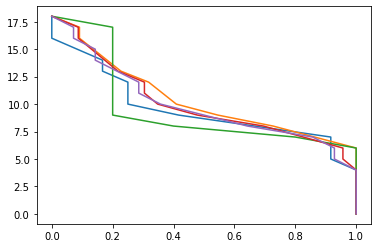

In [85]:
plt.plot(np.array(recall).T, np.arange(0,19))

In [86]:
preci = []
for i in range(len(RA_len)):
    preci.append(count_l_RA_pred[i] / Dm.num_movement_scit1[0::2])

In [87]:
np.array(preci)[:,4].mean()

0.9199999999999999

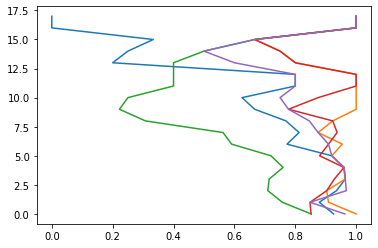

In [88]:
plt.plot(np.array(preci).T, np.arange(0,19))

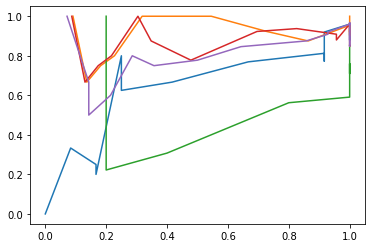

In [89]:
plt.plot(np.array(recall).T, np.array(preci).T)

In [90]:
outv = Dv.iloc[0::2]
outv.to_csv('outv.csv')

In [19]:
outm = Dm.iloc[0::2]
outm.to_csv('outm.csv')